<a href="https://colab.research.google.com/github/ItchelTG/CdeCMx/blob/master/Copia_de_Copia_de_test2_1_rgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Casos covid

#Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Funciones

In [ ]:
def plot_muni(cases_est, muni,n):
  '''
  Crea un plot en base a una lista con el nombre de municipios del estado
  y saca un promedio de "n" valores para suavizar la grafica
  '''
  suavitel = cases_est[muni].rolling(window = n).mean()     # Media en un caso
  suavitel.fillna(0, inplace=True)                          # Convertir nan a 0  
  dates = cases_est.index                                   # Dias desde 12/Ene
  plt.plot(dates,                                           # Eje x: Dias
           suavitel,                                        # Eje y Casos covid
           label=muni,                                      # Simbologia
           linewidth = 2)

#Main

In [ ]:
# Clonar github Alma
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 305 (delta 117), reused 221 (delta 67), pack-reused 0
Receiving objects: 100% (305/305), 43.24 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
df_raw = pd.read_csv(
    '/content/group_A_AlmaJair/datos_covid/Casos_Diarios_Municipio_Confirmados_20200808.csv')
#display(df_raw)

In [ ]:
df_orden = (df_raw.drop(columns = ['cve_ent'])   # Quitar cve_ent
            .set_index('nombre')                 # Columna nombre al index 0
            .sort_values('nombre'))              # Ordenar por nombre
#display(df_orden)

In [ ]:
# DO NOT RUN THIS TWICE!!!
# Cambia dd-mm-yyyy a mm-dd
df_orden.columns = [x[:5][3:6] +'-'+ x[:5][:2] for x in df_orden.columns]
df_transp = df_orden.rename(columns = {'la-po':'poblacion'}).T

###Valores para grafica de casos

In [ ]:
# Casos por dia para municipio
estados = ['Ensenada','Mexicali','Tecate',      # Municipios del estado
           'Tijuana','Playas de Rosarito']      
df_bc = (df_transp[estados][1:])                # Ignorar primera fila (poblacion)

df_bc_detail = df_bc.query('index > "03-05"')   # Datos apartir del 5 de marzo
#display(df_bc, df_bc_detail)

###Valores para grafica de Barras

In [ ]:
pob_tot = (df_transp[estados][:1]                 # array to list
           .values.tolist().pop()) 

prcnt_pob = [0.335, 0.257, 0.266, 0.295, 0.378]   # Porcentaje de pobreza
prcnt_ric = [0.227,0.343,0.288,0.29,0.162]        # Porcentaje de no pobre

pob_pob = [int(pob_tot[x]*prcnt_pob[x])           # Poblacion pobre
           for x in range(len(pob_tot))]          
pob_ric = [int(pob_tot[x]*prcnt_ric[x])           # Poblacion no pobre
           for x in range(len(pob_tot))]          
#display(pob_tot,pob_pob,pob_ric)

#Plot

##Casos desde Marzo

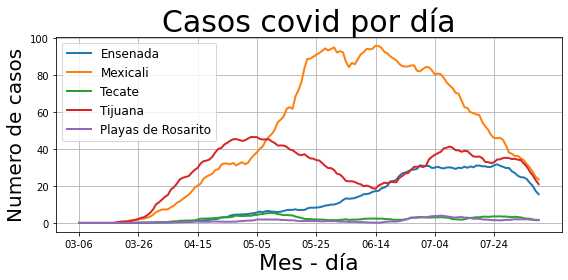

In [ ]:
#plt.style.use('fivethirtyeight')         # Estilos de ploteo
plt.figure(figsize=(8,4))                 # Tamaño de ploteo

for municipio in df_bc_detail:            # Loop nombre de municipios
  plot_muni(df_bc_detail, municipio, 14)

plt.xticks(df_bc_detail.index[::20])      # Division de meses

plt.title('Casos covid por día',          # Titulo
          fontsize = 30)                
plt.xlabel('Mes - día',                   # Eje x
           fontsize = 22)               
plt.ylabel('Numero de casos',             # Eje y 
           fontsize = 20)               
plt.legend(loc = 'upper left',            # Leyenda y ubicación
           fontsize = 12)               
plt.tight_layout()
plt.grid(True)

plt.savefig('bc_detail.png')
plt.show()

##Barras

In [ ]:
arr = np.arange(len(estados))           # Array para los 5 casos

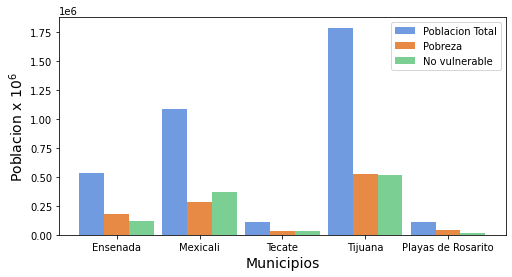

In [ ]:
plt.figure(figsize = (8,4))

plt.bar(arr, pob_tot, 0.3,              # 1er plot: poblacion total
        color = '#709be0',              # Color hex
        label = 'Poblacion Total')      # Leyenda

plt.bar(arr+0.3, pob_pob, 0.3,          # 2do plot: poblacion en pobreza
        color = '#e68a45',
        label = 'Pobreza')

plt.bar(arr+0.6, pob_ric, 0.3,          # 3er plot: poblacion no pobre
        color = '#7ccf92',
        label = 'No vulnerable')

plt.xticks(arr+0.3,estados)             # Centrar municipios en eje x

plt.xlabel('Municipios',
           fontsize = 14) 
plt.ylabel('Poblacion x $10^6$',
           fontsize = 14) 

plt.grid(False)
plt.legend()

plt.savefig('pobreza.png')
plt.show()